In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/home/devjith/Luminar/Machine Learning/files/synthetic_health_classification_data.csv")

In [3]:
df

,Age,Weight,Height,BMI,Blood Pressure,Heart Rate,Cholesterol,Glucose,Calcium,Iron,Vitamin D,Health_Status
0,56.0 years,97.7 kg,167.7 cm,24.1 kg/m²,137.0 mmHg,91.0 bpm,197.5 mg/dL,104.3 mg/dL,8.3 mg,110.8 mg,51.9 µg,Vitamin D Deficiency
1,69.0 years,66.9 kg,173.4 cm,20.9 kg/m²,145.0 mmHg,60.0 bpm,215.3 mg/dL,169.8 mg/dL,8.8 mg,149.4 mg,33.3 µg,Iron Deficiency
2,46.0 years,91.2 kg,189.0 cm,19.8 kg/m²,133.0 mmHg,84.0 bpm,223.7 mg/dL,157.7 mg/dL,10.6 mg,82.1 mg,51.3 µg,Obesity
3,32.0 years,55.4 kg,171.3 cm,33.4 kg/m²,102.0 mmHg,94.0 bpm,176.3 mg/dL,147.6 mg/dL,8.1 mg,154.4 mg,11.7 µg,Obesity
4,60.0 years,NaN,186.2 cm,35.0 kg/m²,93.0 mmHg,69.0 bpm,133.6 mg/dL,134.8 mg/dL,9.8 mg,51.7 mg,31.3 µg,Vitamin D Deficiency
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,24.0 years,97.3 kg,163.7 cm,24.6 kg/m²,152.0 mmHg,98.0 bpm,220.0 mg/dL,139.7 mg/dL,10.0 mg,50.5 mg,24.4 µg,Healthy
4996,66.0 years,85.1 kg,188.8 cm,22.1 kg/m²,153.0 mmHg,56.0 bpm,250.4 mg/dL,149.0 mg/dL,10.5 mg,40.7 mg,29.9 µg,Healthy
4997,26.0 years,47.9 kg,177.8 cm,24.3 kg/m²,121.0 mmHg,83.0 bpm,195.4 mg/dL,133.4 mg/dL,10.8 mg,61.1 mg,57.4 µg,High BP
4998,53.0 years,93.6 kg,166.1 cm,19.9 kg/m²,98.0 mmHg,90.0 bpm,184.7 mg/dL,177.4 mg/dL,10.0 mg,153.3 mg,30.4 µg,Healthy


In [4]:
df.dtypes

Age               object
Weight            object
Height            object
BMI               object
Blood Pressure    object
Heart Rate        object
Cholesterol       object
Glucose           object
Calcium           object
Iron              object
Vitamin D         object
Health_Status     object
dtype: object

In [5]:
df['Age'] = df['Age'].str.replace("years","")
df['Weight'] = df["Weight"].str.replace("kg","")
df['Height'] = df['Height'].str.replace("cm",'')
df['BMI'] = df['BMI'].str.replace("kg/m²",'')
df['Blood Pressure'] = df['Blood Pressure'].str.replace("mmHg",'')
df["Heart Rate"] = df['Heart Rate'].str.replace("bpm",'')
df['Cholesterol'] = df["Cholesterol"].str.replace("mg/dL",'')
df['Glucose'] = df['Glucose'].str.replace("mg/dL",'')
df['Calcium'] = df['Calcium'].str.replace("mg",'')
df['Iron'] = df['Iron'].str.replace("mg","")
df['Vitamin D'] = df['Vitamin D'].str.replace("µg",'')

In [6]:
df.isna().sum()

Age                 0
Weight            250
Height              0
BMI                 0
Blood Pressure    250
Heart Rate          0
Cholesterol       250
Glucose           250
Calcium             0
Iron                0
Vitamin D           0
Health_Status       0
dtype: int64

In [7]:
x = df.iloc[:,:-1]
for i in x.columns:
    if x[i].dtype == object:
        x[i] = x[i].astype(float)

In [8]:
x.isna().sum()

Age                 0
Weight            250
Height              0
BMI                 0
Blood Pressure    250
Heart Rate          0
Cholesterol       250
Glucose           250
Calcium             0
Iron                0
Vitamin D           0
dtype: int64

In [9]:
x['Glucose'].unique()

array([104.3, 169.8, 157.7, ..., 131.4, 130.6, 136. ], shape=(1086,))

In [10]:
x['Weight'] = x['Weight'].fillna(x['Weight'].mean())
x['Blood Pressure'] = x['Blood Pressure'].fillna(x['Blood Pressure'].mean())
x['Cholesterol'] = x['Cholesterol'].fillna(x['Cholesterol'].mean())
x['Glucose'] = x['Glucose'].fillna(x['Glucose'].mean())

In [11]:
x = x.values

In [12]:
y=df.iloc[:,-1]

In [13]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=42)

In [24]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(n_estimators=500,bootstrap=True,criterion='entropy',n_jobs=-1)
model2.fit(x_train,y_train)

,n_estimators,500
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
y_pred2 = model2.predict(x_test)

In [16]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy')

model.fit(x_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [17]:
y_pred = model.predict(x_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score

print(classification_report(y_test,y_pred2))
cm = confusion_matrix(y_test,y_pred2)
print(accuracy_score(y_test,y_pred2))


                      precision    recall  f1-score   support

             Healthy       0.20      0.24      0.22       315
             High BP       0.20      0.17      0.18       289
     Iron Deficiency       0.21      0.19      0.20       290
             Obesity       0.19      0.24      0.21       320
Vitamin D Deficiency       0.21      0.15      0.17       286

            accuracy                           0.20      1500
           macro avg       0.20      0.20      0.20      1500
        weighted avg       0.20      0.20      0.20      1500

0.19866666666666666


[Text(0.6035082798165394, 0.9814814814814815, 'Glucose <= 131.65\nentropy = 2.32\nsamples = 3500\nvalue = [722, 672, 698, 748, 660]\nclass = Obesity'),
 Text(0.3834124578159643, 0.9444444444444444, 'Iron <= 140.95\nentropy = 2.317\nsamples = 2087\nvalue = [450, 363, 452, 432, 390]\nclass = High BP'),
 Text(0.4934603688162519, 0.962962962962963, 'True  '),
 Text(0.2305159561628601, 0.9074074074074074, 'Iron <= 95.05\nentropy = 2.318\nsamples = 1759\nvalue = [354, 314, 381, 380, 330]\nclass = High BP'),
 Text(0.08274646610447776, 0.8703703703703703, 'BMI <= 25.75\nentropy = 2.306\nsamples = 944\nvalue = [205, 142, 215, 210, 172]\nclass = High BP'),
 Text(0.00802637621474283, 0.8333333333333334, 'Height <= 150.5\nentropy = 2.298\nsamples = 426\nvalue = [106.0, 61.0, 89.0, 77.0, 93.0]\nclass = Vitamin D Deficiency'),
 Text(0.003436833372837165, 0.7962962962962963, 'Age <= 51.0\nentropy = 0.863\nsamples = 7\nvalue = [0, 5, 0, 0, 2]\nclass = Iron Deficiency'),
 Text(0.0028047720628901003, 0.

Error in callback <function _draw_all_if_interactive at 0x7815bc433420> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

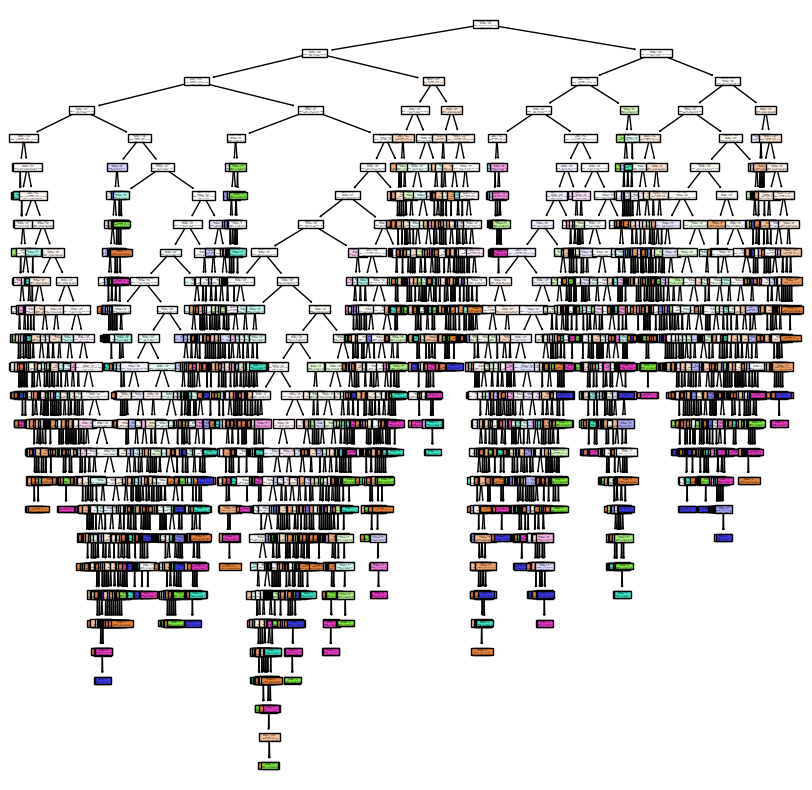

In [20]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(model,feature_names=['Age','Weight','Height','BMI','Blood Pressure','Heart Rate','Cholesterol','Glucose','Calcium','Iron','Vitamin D'],class_names=['Vitamin D Deficiency','Iron Deficiency','High BP','Obesity','Healthy'],filled=True)

In [24]:
y_train.unique()

array(['High BP', 'Obesity', 'Iron Deficiency', 'Healthy',
       'Vitamin D Deficiency'], dtype=object)

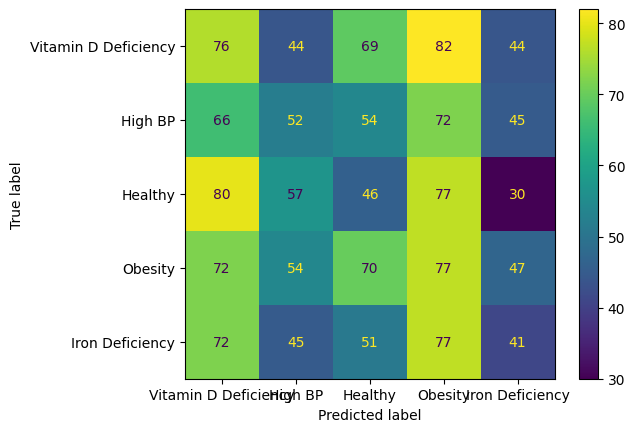

In [21]:
cmd = ConfusionMatrixDisplay(cm,display_labels=['Vitamin D Deficiency', 'High BP', 'Healthy', 'Obesity','Iron Deficiency'])
cmd.plot()